# Redes Neuronales

In [45]:
pip install optuna

     |████████████████████████████████| 235kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 7.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 112kB 16.8MB/s 
     |████████████████████████████████| 133kB 13.5MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=13c88305ba605e33c1d963b3cd6ae816cf4edaa1a1f387dd1b2a6b556426192a
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-2.0.0-cp36-none-any.whl size=312964 sha256=5c7977d07528b3a4ff6030c63716e9b15ba1591fa3aa19ae4e5eabfb651ac089
  Stored in directory: /root/.cache/pip/wheels/b5/

In [2]:
import pandas as pd

def get_mpg_data():
    data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                    header=None,sep='\s+')
    return data

data=get_mpg_data()

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)



In [3]:
data.rename(columns={0:'mpg',1:'cylinders',2:'displacement',3:'horsepower',4:'weight',
             5:'acceleration',6:'model_year',7:'origin',8:'car_name'},inplace=True)

In [4]:
data['car_name'] = data['car_name'].astype('category')
data['horsepower'] = data['horsepower'].astype('float',errors='ignore')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data['model_year'] = data['model_year'].astype('category')
data['origin'] = data['origin'].astype('category')

In [5]:
data.drop('car_name',inplace=True,axis=1)

In [6]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
data['year_range']=pd.cut(data['model_year'], bins=3)

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,year_range
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"(69.988, 74.0]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"(69.988, 74.0]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"(69.988, 74.0]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"(69.988, 74.0]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"(69.988, 74.0]"


In [9]:
data.drop(columns={'model_year'},axis=1,inplace=True)

In [10]:
reg_data=pd.get_dummies(data).copy()
reg_data.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



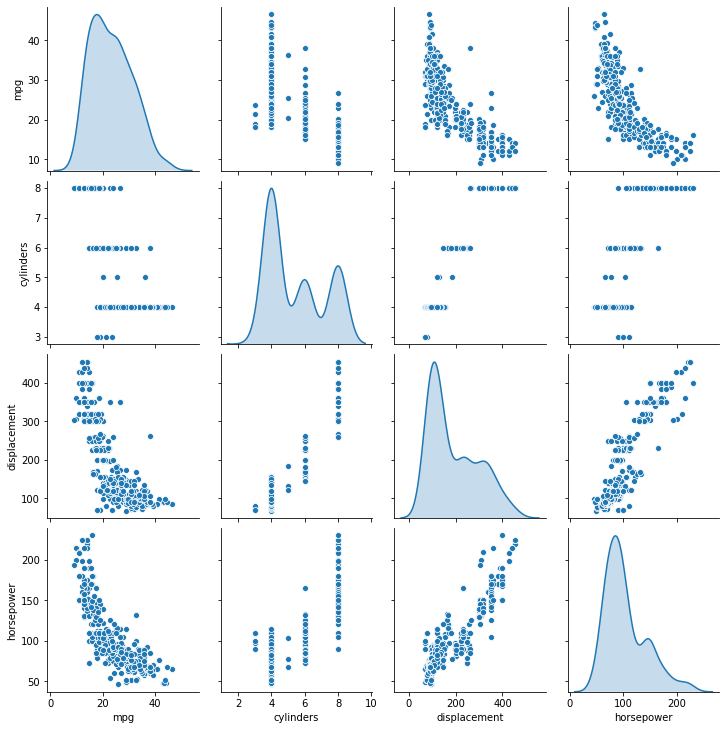

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[["mpg", "cylinders", "displacement", "horsepower"]], diag_kind="kde")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y=reg_data.pop('mpg').values
X=scaler.fit_transform(reg_data.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Red Neuronal Simple

In [14]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print('Tensorflow Version : ',tf.__version__)

def build_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(8,activation='relu', input_shape=[input_dim]),
        layers.Dense(8,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

Tensorflow Version :  2.3.0


In [15]:
model = build_model(X.shape[1])

print("[INFO] training model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32,verbose=0)
print("[DONE] training model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training model...
[DONE] training model...


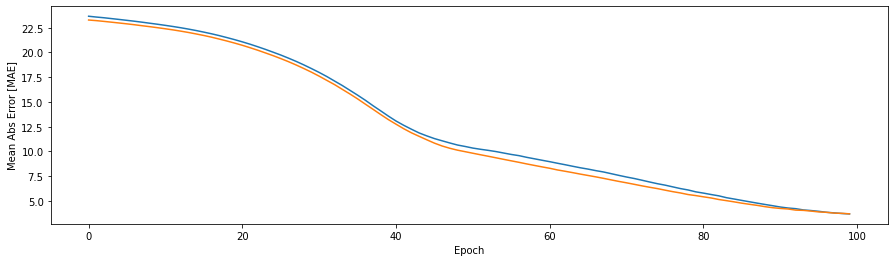

In [16]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

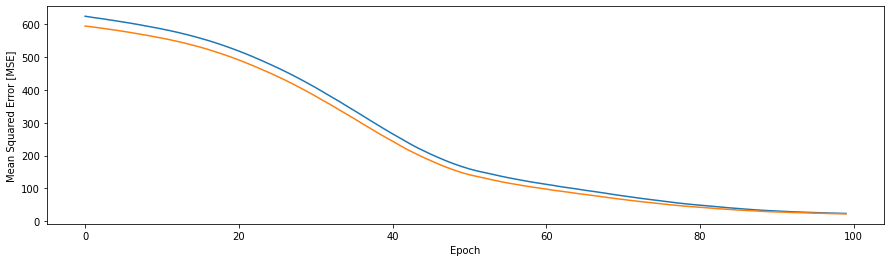

In [17]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.577914


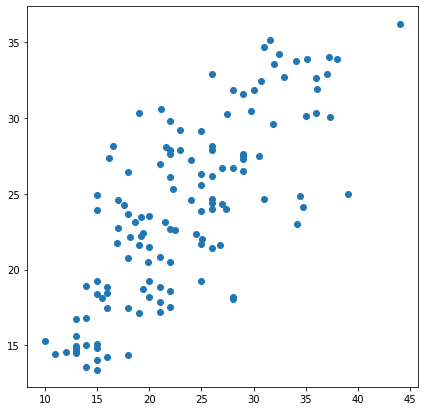

In [18]:
from sklearn.metrics import r2_score

y_hat=model.predict(X_test)
r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Red Neuronal Regularizacion

In [19]:
def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-5,l2=1e-4):
    model = keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[input_dim]),
        layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [20]:
model = build_regularized_model(X.shape[1],l2=1e-1,l1=1e-2)
print("[INFO] training regularized model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),epochs=200, batch_size=32,verbose=0)
print("[DONE] training regularized model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training regularized model...
[DONE] training regularized model...


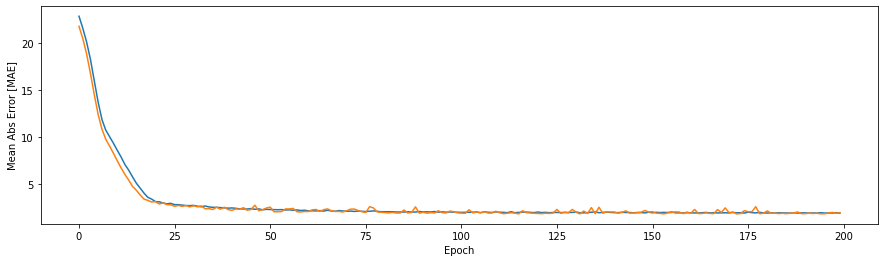

In [21]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

r^2 on test data : 0.860568


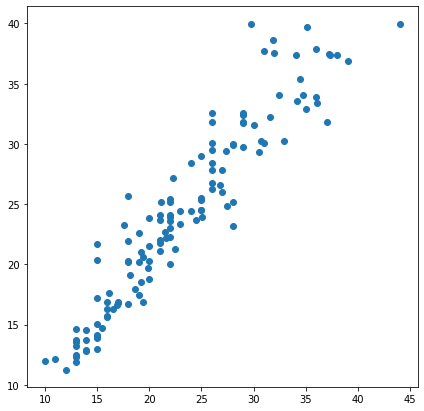

In [22]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Auto Keras

In [76]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.optimizers import RMSprop
import optuna

def objective(trial):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    l1=trial.suggest_float("l1", 1e-5, 1e-1, log=True)
    l2=trial.suggest_float("l2", 1e-4, 1e-1, log=True)
    num_input = trial.suggest_int("n_input", 4, 128, log=True)
    num_hidden = trial.suggest_int("n_hidden", 4, 128, log=True)
    model = Sequential()
    input_dim=X_train.shape[1]
    model.add(layers.Dense(num_input,activation='relu',input_shape=[input_dim]))
    model.add(layers.Dense(num_hidden,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    model.add(layers.Dense(1,activation='linear'))
    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float("lr", 1e-4, 1e-1, log=True)
    model.compile(
        loss="mse", optimizer=RMSprop(lr=lr), metrics=['mae', 'mse']
    )
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        shuffle=True,
        batch_size=32,
        epochs=100,
        verbose=False,
        use_multiprocessing=True,
    )
    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]



In [77]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

[I 2020-08-21 16:40:35,903] Trial 0 finished with value: 2.4707744121551514 and parameters: {'l1': 0.008337748419791163, 'l2': 0.05462328854362641, 'n_input': 68, 'n_hidden': 55, 'lr': 0.07907477651661414}. Best is trial 0 with value: 2.4707744121551514.
[I 2020-08-21 16:40:39,826] Trial 1 finished with value: 2.2709507942199707 and parameters: {'l1': 0.0009814383773227014, 'l2': 0.0024952739154415187, 'n_input': 7, 'n_hidden': 46, 'lr': 0.0017630685654095285}. Best is trial 1 with value: 2.2709507942199707.
[I 2020-08-21 16:40:44,249] Trial 2 finished with value: 2.11405348777771 and parameters: {'l1': 1.6494603621839234e-05, 'l2': 0.09597692520814724, 'n_input': 25, 'n_hidden': 37, 'lr': 0.02664574175985156}. Best is trial 2 with value: 2.11405348777771.
[I 2020-08-21 16:40:47,982] Trial 3 finished with value: 2.187958002090454 and parameters: {'l1': 0.001889455179523818, 'l2': 0.0026916144076914025, 'n_input': 7, 'n_hidden': 65, 'lr': 0.017310543787237377}. Best is trial 2 with valu

Number of finished trials: 100
Best trial:
  Value: 1.7815217971801758


In [78]:
optuna.visualization.plot_contour(study, params=['l1', 'l2'])

In [79]:
optuna.visualization.plot_contour(study, params=['n_input', 'n_hidden'])

In [100]:
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

    l1: 4.211005045997947e-05
    l2: 0.0007206717039080244
    n_input: 120
    n_hidden: 128
    lr: 0.013995877859076786


In [97]:
def build_auto_model(params):
  clear_session()
  model = Sequential()
  input_dim=X_train.shape[1]
  model.add(layers.Dense(params['n_input'],activation='relu',input_shape=[input_dim]))
  model.add(layers.Dense(params['n_hidden'],activation='relu',
                         kernel_regularizer=regularizers.l1_l2(l1=params['l1'], l2=params['l2'])))
  model.add(layers.Dense(1,activation='linear'))
  lr = params['lr']
  model.compile(loss="mse", optimizer=RMSprop(lr=lr), metrics=['mae', 'mse'])
  return model

model=build_auto_model(study.best_params)
print("[INFO] training auto model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                  use_multiprocessing=True,epochs=200, batch_size=32,verbose=0)
print("[DONE] training auto model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


[INFO] training auto model...
[DONE] training auto model...


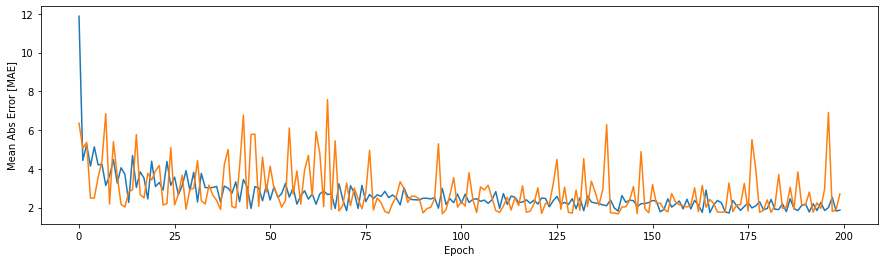

In [98]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

r^2 on test data : 0.794624


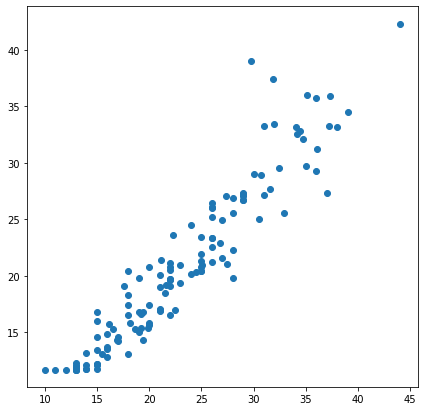

In [99]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [ ]:
# Analisis Exploratorio de Casos COVID 

def get_owid_data(download):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        data.to_csv('data/covid_owid_data.csv')
    else:
        data=pd.read_csv('data/covid_owid_data.csv')
    return data

data=get_owid_data(False)

In [ ]:
grouped_data=data.groupby(['location']).median()
grouped_data.sort_values(by=['new_cases_per_million'],inplace=True,ascending=False)

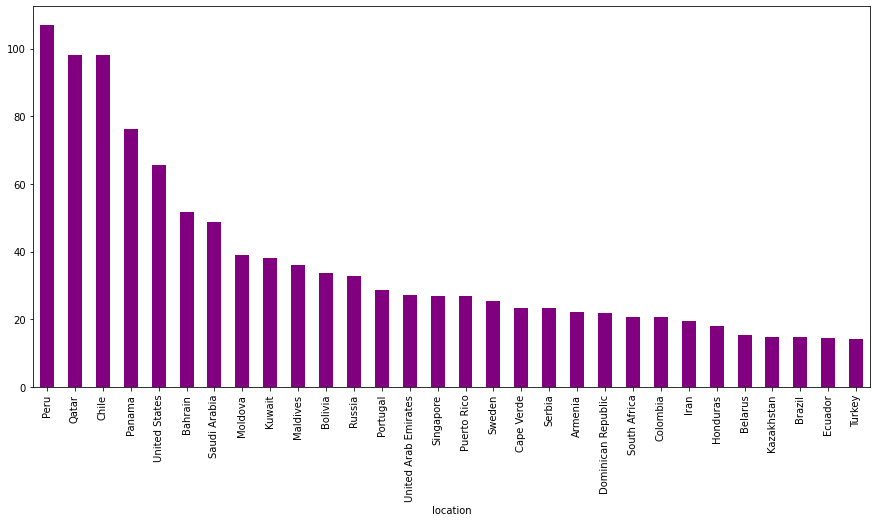

In [ ]:
plt.figure(figsize=(15,7))
grouped_data['new_cases_per_million'].head(30).plot(kind="bar", color='purple')